In [1]:
#Importing libraries-->

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [2]:
#Uploading the dataset & Checking the first five records-->

ipl=pd.read_csv('IPL_Matches_2008_2022.csv')
ipl.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [3]:
#Checking the data information-->

ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [4]:
#Checking for the null values-->

ipl.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [5]:
#Checking for the duplicates-->

ipl.duplicated().sum()

0

In [6]:
#Checking the team with the highest winning margin in terms of runs-->

runs=ipl[ipl['WonBy']=='Runs']
runs[['Margin','WinningTeam']].sort_values(by='Margin', ascending=False).head(1)

,Margin,WinningTeam
329,146.0,Mumbai Indians


In [37]:
#Checking the team with the lowest winning margin in terms of runs-->

runs[['Margin','WinningTeam']].sort_values(by='Margin').head(1)

,Margin,WinningTeam
314,1.0,Mumbai Indians


In [7]:
#Checking the team with the highest winning margin in terms of wickets-->

wickets=ipl[ipl['WonBy']=='Wickets']
wickets[['Margin','WinningTeam']].sort_values(by='Margin', ascending=False).head(1)

,Margin,WinningTeam
467,10.0,Royal Challengers Bangalore


In [38]:
#Checking the team with the lowest winning margin in terms of wickets-->

wickets[['Margin','WinningTeam']].sort_values(by='Margin').head(1)

,Margin,WinningTeam
449,1.0,Kolkata Knight Riders


# Extracting the player of the match-->

In [8]:
#Extracting the player of the match-->

ipl['Player_of_Match'].value_counts().head()

AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
Name: Player_of_Match, dtype: int64

In [9]:
#Considering only the keys-->

ipl['Player_of_Match'].value_counts().head().keys()

Index(['AB de Villiers', 'CH Gayle', 'DA Warner', 'RG Sharma', 'MS Dhoni'], dtype='object')

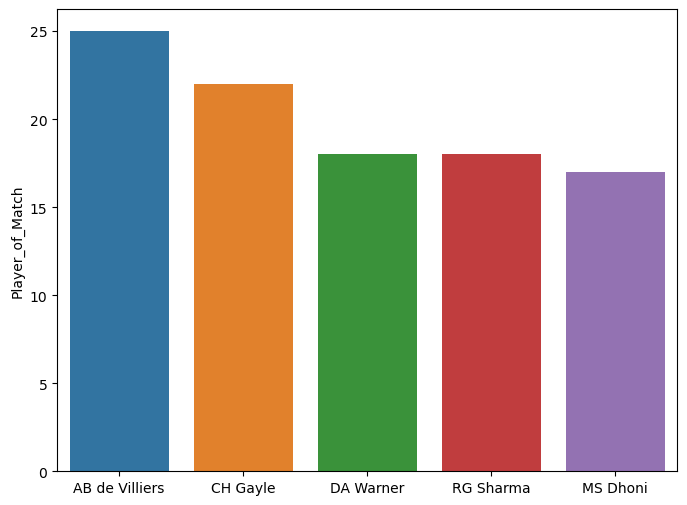

In [10]:
#Creating a Barplot-->

plt.figure(figsize=(8,6))
sns.barplot(x=ipl['Player_of_Match'].value_counts().head().keys(), y=ipl['Player_of_Match'].value_counts().head(), data=ipl)
plt.show()

# Extracting the Toss Winner-->

In [11]:
#Extracting the Toss winners-->

ipl['TossWinner'].value_counts().head()

Mumbai Indians                 123
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Name: TossWinner, dtype: int64

In [12]:
#Extracting only the keys-->

ipl['TossWinner'].value_counts().head().keys()

Index(['Mumbai Indians', 'Kolkata Knight Riders', 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Rajasthan Royals'],
      dtype='object')

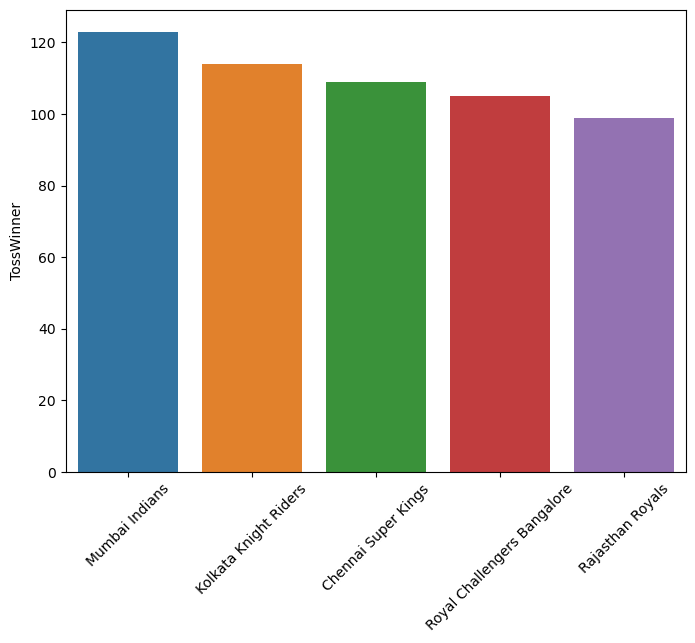

In [13]:
#Creating a Barplot-->

plt.figure(figsize=(8,6))
sns.barplot(x=ipl['TossWinner'].value_counts().head().keys(),y=ipl['TossWinner'].value_counts().head(), data=ipl)
plt.xticks(rotation=45)
plt.show()

# Extracting Batting First Winners-->

In [14]:
#Creating a new dataset of batting first winners-->

batting_first=ipl[ipl['WonBy']=='Runs']

In [15]:
#Checking the first five records-->

batting_first.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
8,1304112,Navi Mumbai,2022-05-18,2022,66,Lucknow Super Giants,Kolkata Knight Riders,"Dr DY Patil Sports Academy, Mumbai",Lucknow Super Giants,bat,N,Lucknow Super Giants,Runs,2.0,NaN,Q de Kock,"['Q de Kock', 'KL Rahul', 'E Lewis', 'DJ Hooda...","['VR Iyer', 'A Tomar', 'N Rana', 'SS Iyer', 'S...",R Pandit,YC Barde


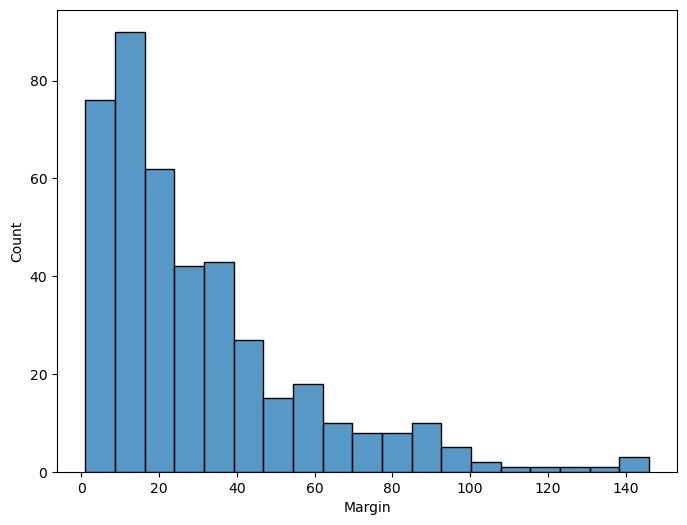

In [16]:
#Checking the frequency of the margin of batting first wins-->

plt.figure(figsize=(8,6))
sns.histplot(batting_first['Margin'])
plt.show()

In [17]:
#Checking the top 5 teams with most wins-->

batting_first['WinningTeam'].value_counts().head()

Mumbai Indians                 66
Chennai Super Kings            61
Royal Challengers Bangalore    48
Kolkata Knight Riders          45
Kings XI Punjab                40
Name: WinningTeam, dtype: int64

In [18]:
batting_first['WinningTeam'].value_counts().head().keys()

Index(['Mumbai Indians', 'Chennai Super Kings', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab'],
      dtype='object')

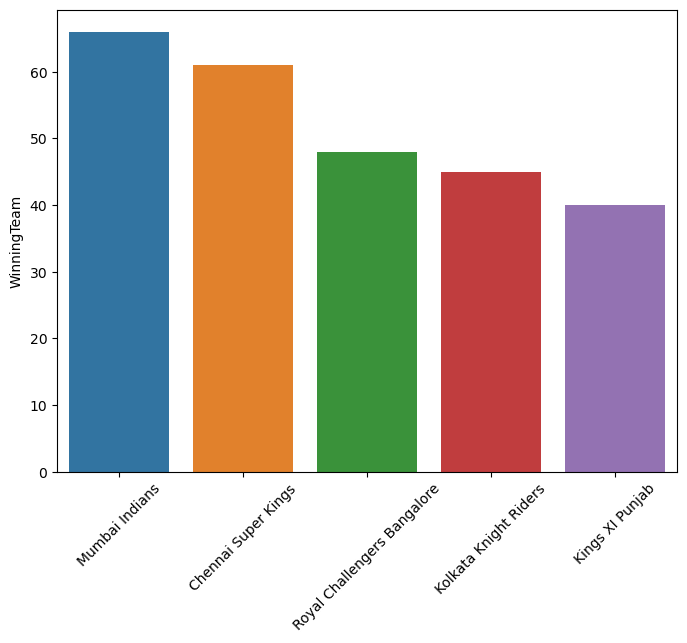

In [19]:
#Creating a Barplot-->

plt.figure(figsize=(8,6))
sns.barplot(x=batting_first['WinningTeam'].value_counts().head().keys(), 
            y=batting_first['WinningTeam'].value_counts().head(), data=batting_first)
plt.xticks(rotation=45)
plt.show()

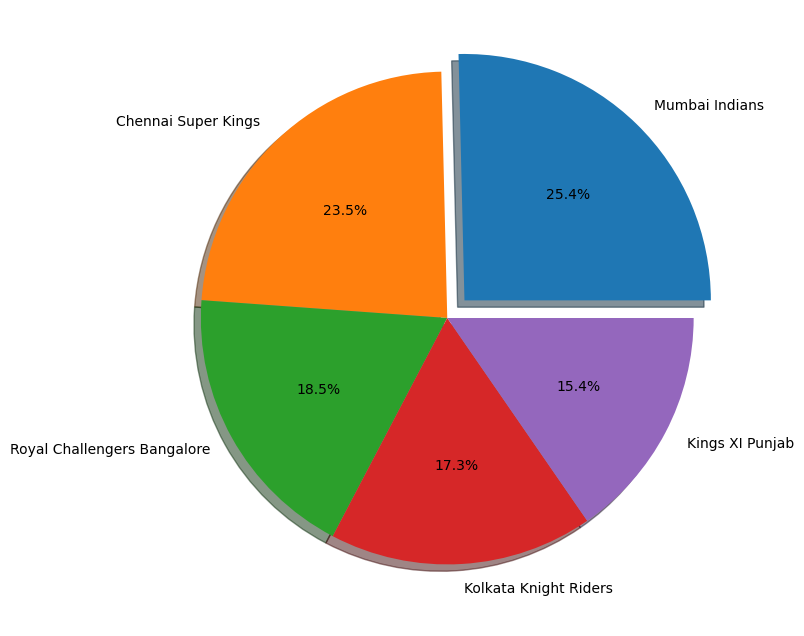

In [20]:
#Creating a Piechart-->

plt.figure(figsize=(12,8))
plt.pie(batting_first['WinningTeam'].value_counts().head(),
        labels=batting_first['WinningTeam'].value_counts().head().keys(), autopct='%.1f%%', 
        explode=[0.1, 0, 0, 0, 0], shadow=True)
plt.show()

# Extracting batting second winners-->

In [21]:
#Creating a new dataset of batting second winners-->

batting_second=ipl[ipl['WonBy']=='Wickets']

In [22]:
batting_second.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
5,1304115,Mumbai,2022-05-21,2022,69,Delhi Capitals,Mumbai Indians,"Wankhede Stadium, Mumbai",Mumbai Indians,field,N,Mumbai Indians,Wickets,5.0,NaN,JJ Bumrah,"['PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant'...","['Ishan Kishan', 'RG Sharma', 'D Brevis', 'Til...",Nitin Menon,Tapan Sharma


In [23]:
batting_second['WinningTeam'].value_counts().head()

Kolkata Knight Riders          68
Mumbai Indians                 63
Chennai Super Kings            60
Royal Challengers Bangalore    59
Rajasthan Royals               57
Name: WinningTeam, dtype: int64

In [24]:
batting_second['WinningTeam'].value_counts().head().keys()

Index(['Kolkata Knight Riders', 'Mumbai Indians', 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Rajasthan Royals'],
      dtype='object')

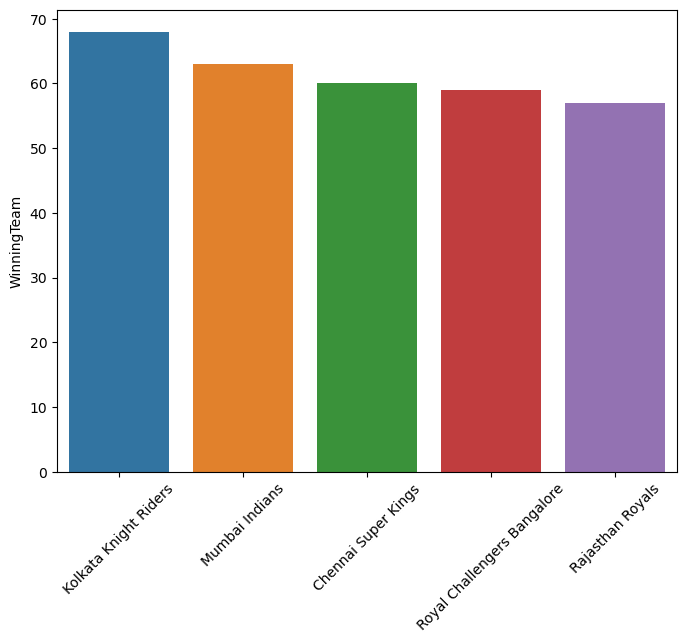

In [25]:
plt.figure(figsize=(8,6))
sns.barplot(x=batting_second['WinningTeam'].value_counts().head().keys(),
            y=batting_second['WinningTeam'].value_counts().head(), data=batting_second)
plt.xticks(rotation=45)
plt.show()

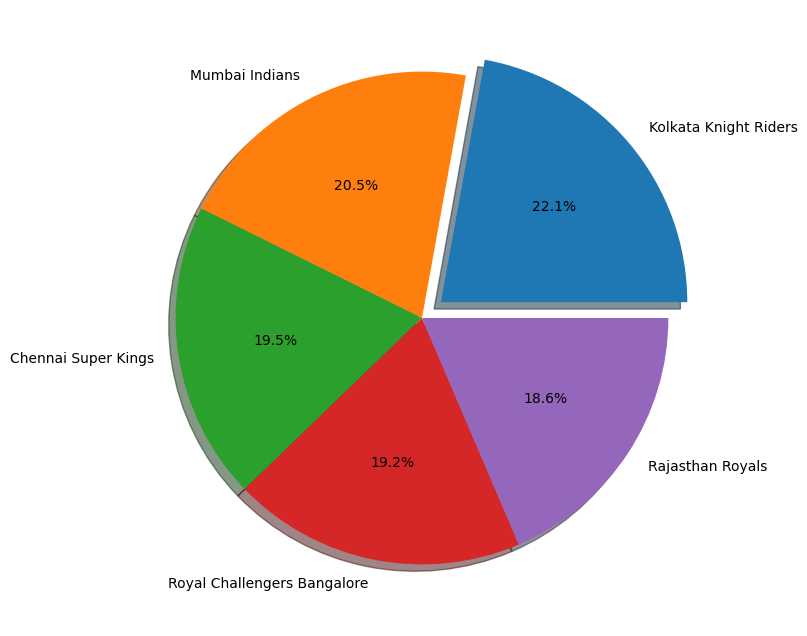

In [26]:
#Creating a Piechart-->

plt.figure(figsize=(10,8))
plt.pie(batting_second['WinningTeam'].value_counts().head(),
        labels=batting_second['WinningTeam'].value_counts().head().keys(), 
        autopct='%0.1f%%', explode=[0.1,0,0,0,0], shadow=True)
plt.show()

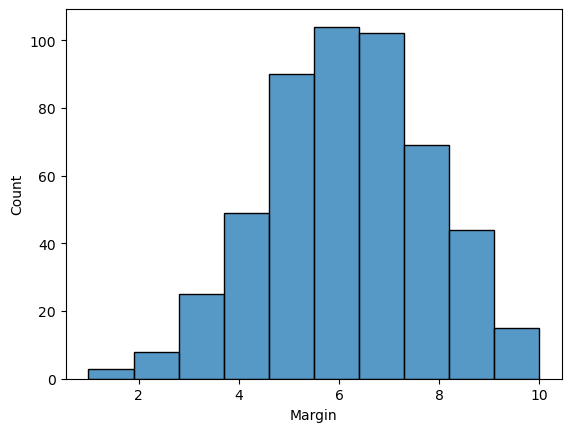

In [27]:
#Frequency of the Margin of wins-->

sns.histplot(batting_second['Margin'], bins=10)
plt.show()

# Top 5 Hosts-->

In [28]:
#Top 5 cities to host the matches-->

ipl['City'].value_counts().head()

Mumbai       159
Kolkata       79
Delhi         78
Chennai       67
Bangalore     65
Name: City, dtype: int64

# Top 5 Seasons-->

In [29]:
#Cleaning the 'Season' column & checking the top 5 'Seasons' with most no of matches-->

ipl['Season']=ipl['Season'].apply(lambda x:x.split('/')[0])
ipl['Season'].value_counts().head()

2009    117
2013     76
2022     74
2012     74
2011     73
Name: Season, dtype: int64

# Top 5 Venues-->

In [30]:
#Top 5 'Venues'-->

ipl['Venue'].value_counts().head()

Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Feroz Shah Kotla                             60
Rajiv Gandhi International Stadium, Uppal    49
Name: Venue, dtype: int64

# Checking the Toss result-->

In [31]:
#Checking the result of winning the toss-->

ipl['TossDecision'].value_counts()

field    599
bat      351
Name: TossDecision, dtype: int64

In [32]:
print('Percentage of opting to Field -->',(599/len(ipl))*100)

Percentage of opting to Field --> 63.05263157894737


# Checking the Teams with most num of Wins-->

In [33]:
ipl['WinningTeam'].value_counts().head()

Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Name: WinningTeam, dtype: int64

# Checking the top 5 Toss winners-->

In [34]:
ipl['TossWinner'].value_counts().head()

Mumbai Indians                 123
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Name: TossWinner, dtype: int64

In [35]:
#To check whether toss winning teams wins the match or not 

win=ipl[ipl['TossWinner']==ipl['WinningTeam']]
win.shape

(489, 20)

In [36]:
print('Percentage of teams winning the toss winning the match as well -->',(489/len(ipl))*100)

Percentage of teams winning the toss winning the match as well --> 51.473684210526315
